In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# get data

In [2]:
df = pd.read_csv('/content/personality_datasert.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


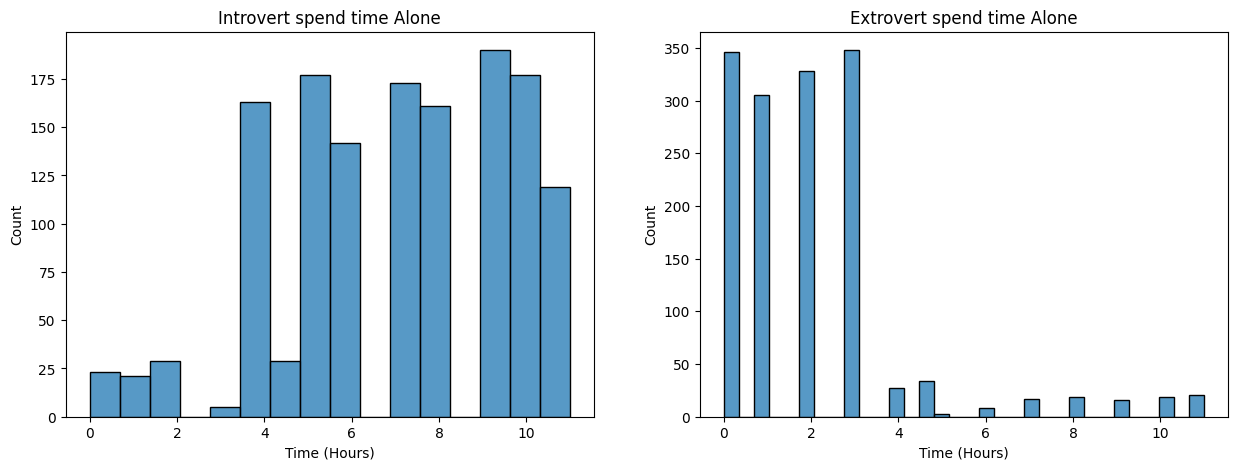

In [4]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(df[df['Personality']== 'Introvert'], x = 'Time_spent_Alone', bins = 'auto')
plt.title('Introvert spend time Alone')
plt.xlabel('Time (Hours)')

plt.subplot(1,2,2)
sns.histplot(df[df['Personality']== 'Extrovert'], x = 'Time_spent_Alone', bins = 'auto')
plt.title('Extrovert spend time Alone')
plt.xlabel('Time (Hours)')

plt.show()

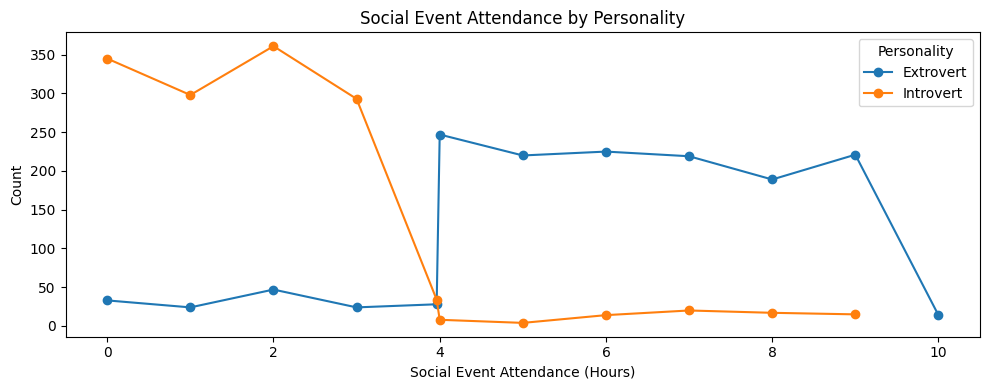

In [5]:
social_event_count = df.groupby(['Social_event_attendance', 'Personality']).size().unstack()

social_event_count.plot( figsize=(10, 4), marker = 'o')
plt.xlabel('Social Event Attendance (Hours)')
plt.ylabel('Count')
plt.title('Social Event Attendance by Personality')
plt.xticks(rotation=0)
plt.legend(title='Personality')
plt.tight_layout()
plt.show()

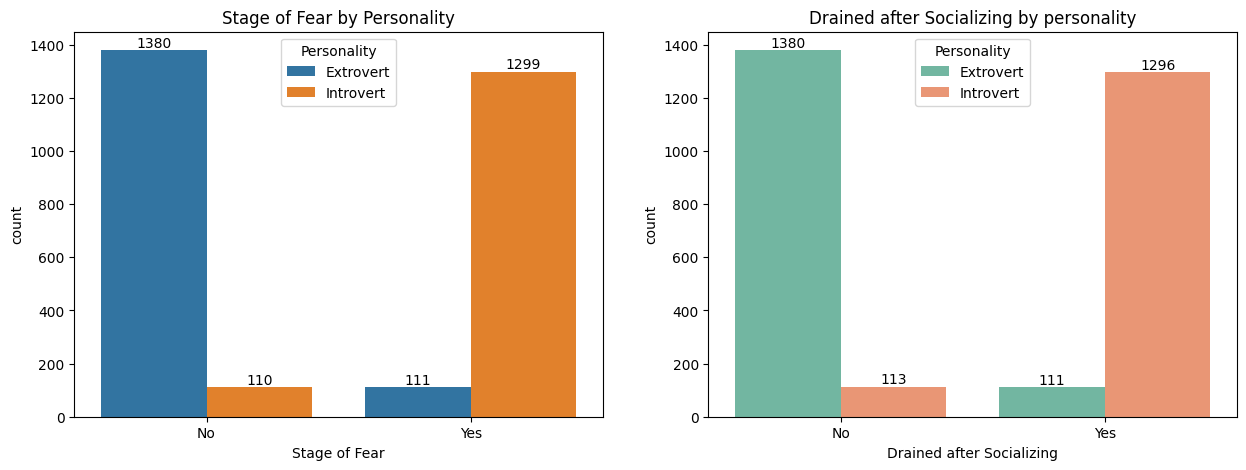

In [12]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1= sns.countplot(df, x = 'Stage_fear', hue = 'Personality')
for container in ax1.containers:
    ax1.bar_label(container)
plt.title('Stage of Fear by Personality')
plt.xlabel('Stage of Fear')

plt.subplot(1,2,2)
ax2 = sns.countplot(df, x = 'Drained_after_socializing', hue = 'Personality', palette= 'Set2')
for container in ax2.containers:
    ax2.bar_label(container)
plt.title('Drained after Socializing by personality')
plt.xlabel('Drained after Socializing')

plt.show()

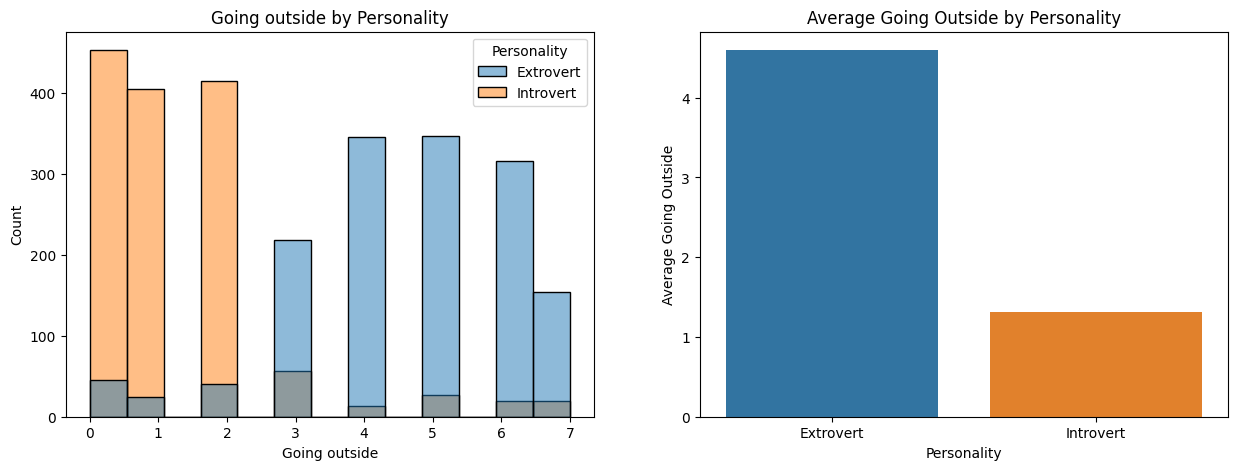

In [18]:
avg_personality_go_outside = df.groupby('Personality')['Going_outside'].mean().reset_index()
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(df, x ='Going_outside', hue = 'Personality', bins = 'auto')
plt.title('Going outside by Personality')
plt.xlabel('Going outside')

plt.subplot(1,2,2)
sns.barplot(x='Personality', y='Going_outside', hue= 'Personality', data=avg_personality_go_outside)
plt.title('Average Going Outside by Personality')
plt.xlabel('Personality')
plt.ylabel('Average Going Outside')

plt.show()


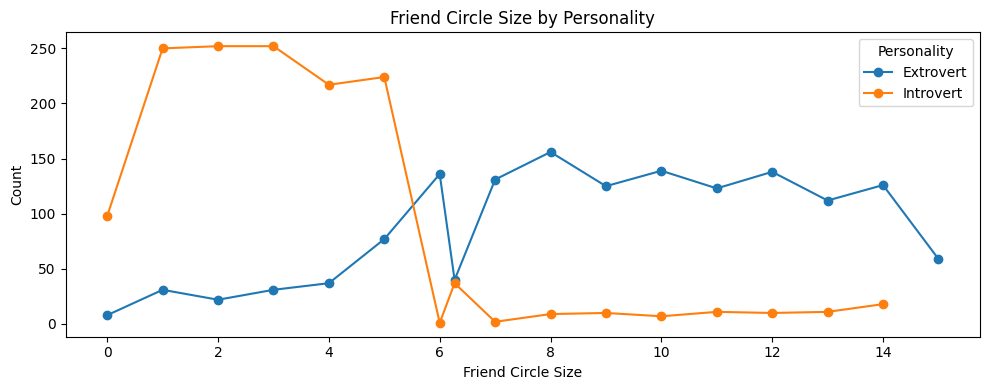

In [21]:
friend_circle_size = df.groupby(['Friends_circle_size', 'Personality']).size().unstack()

friend_circle_size.plot(marker = 'o', figsize=(10, 4))
plt.xlabel('Friend Circle Size')
plt.ylabel('Count')
plt.title('Friend Circle Size by Personality')
plt.xticks(rotation=0)
plt.legend(title='Personality')
plt.tight_layout()
plt.show()

In [ ]:
# encode categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Stage_fear'] = le.fit_transform(df['Stage_fear'])
df['Drained_after_socializing'] = le.fit_transform(df['Drained_after_socializing'])
df['Personality'] = le.fit_transform(df['Personality'])

In [ ]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


<Axes: >

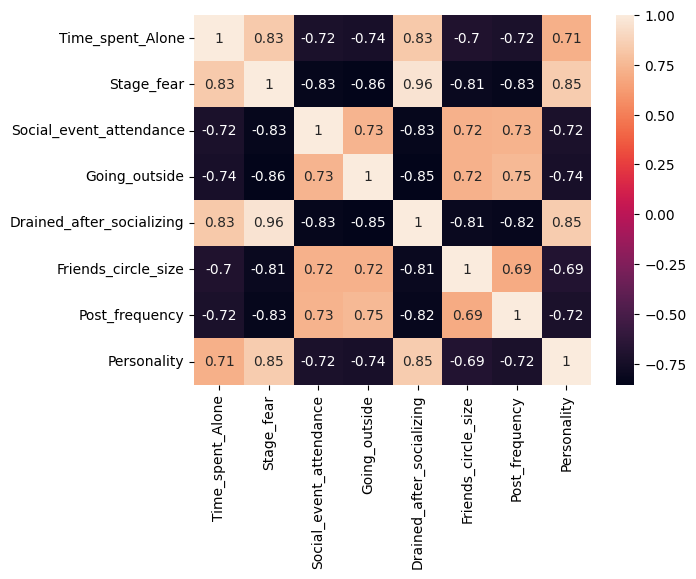

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
X = df.drop(['Personality'], axis=1)
y = df['Personality']


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# fetaure engineering
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Creating model

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # binary model

# Training model

In [ ]:
# use early stoping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4672 - loss: 0.6689 - val_accuracy: 0.9241 - val_loss: 0.4532
Epoch 2/600
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9294 - loss: 0.4239 - val_accuracy: 0.9293 - val_loss: 0.3257
Epoch 3/600
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9400 - loss: 0.3120 - val_accuracy: 0.9293 - val_loss: 0.2868
Epoch 4/600
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9379 - loss: 0.2718 - val_accuracy: 0.9293 - val_loss: 0.2781
Epoch 5/600
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9401 - loss: 0.2609 - val_accuracy: 0.9293 - val_loss: 0.2755
Epoch 6/600
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9358 - loss: 0.2700 - val_accuracy: 0.9293 - val_loss: 0.2739
Epoch 7/600
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9382 - loss: 0.2600 - val_accuracy: 0.9293 - val_loss: 0.2726
Epoch 8/600
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9259 - loss: 0.2947 - val_accuracy: 0.9293 - 

<Axes: >

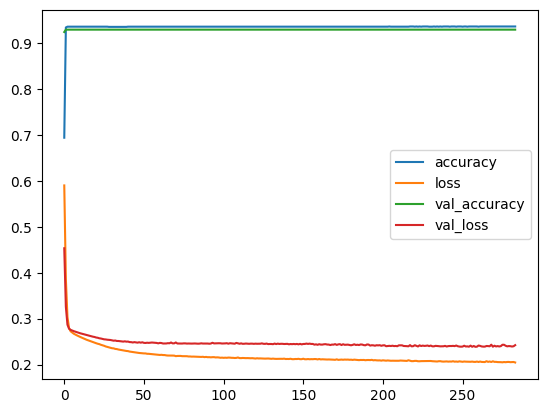

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       302
           1       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580

[[278  24]
 [ 17 261]]
